In [14]:
from cellmask_model import CellMaskModel
import os
import cellmask_model
import importlib
importlib.reload(cellmask_model)
from cellmask_model import CellMaskModel, dice_evaluate

In [15]:
images_path = os.getcwd() + '/812_plate/'
model = CellMaskModel(device="cuda:0")

In [4]:
model.get_data(images_path)

importing images
(5, 1080, 1080, 4)
(5, 1080, 1080, 4)
imported images successfully
getting model


100%|██████████| 25.3M/25.3M [00:02<00:00, 10.9MB/s]


got model
getting data
got data


c:\Users\rz200\Documents\development\u_net_exploration\data_acquiring.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  flows = np.array(flows)
c:\Users\rz200\Documents\development\u_net_exploration\data_acquiring.py:153: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:210.)
  imgs_aug = torch.tensor(imgs_aug)


In [18]:
first_path_new_model = os.getcwd() + '/saved_model/cp_model_2'
second_path_new_model = os.getcwd() + '/saved_model/mask_model_2'

model.train_models(10)
model.save_model(first_path_new_model, second_path_new_model)

[INFO] training the network...
num epochs: 10
learning rate: 0.001
loss: mse


TypeError: object of type 'NoneType' has no len()

In [4]:
#first_path = os.getcwd() + '/saved_model/cp_model'
#second_path = os.getcwd() + '/saved_model/mask_model'

In [111]:
#model.import_model(first_path_new_mode,second_path)

In [164]:
print(dice_evaluate(model))

im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (3, 256, 256)
im2 shape: (3, 256, 256)
0.051926819686884056


In [185]:
import numpy as np
import tifffile

def import_images(images_path,num_imgs=20):
    images = [np.squeeze(tifffile.imread(images_path + str(i) + '.tif')) for i in range(num_imgs)]
    return images

images = import_images(images_path)
imgs = [(image-np.min(image))/(np.max(image)-np.min(image)) for image in images]

im1 shape: (1080, 1080)
im2 shape: (1080, 1080)
0.0
[0]


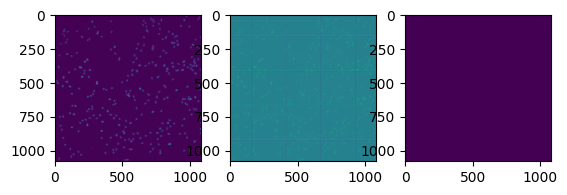

In [248]:
import matplotlib.pyplot as plt
img = imgs[2][:,:,0]
pred, cp_pred = model.eval(img)
print(model.dice_coeff(img,pred))
print(np.unique(pred))

plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(cp_pred)
plt.subplot(1,3,3)
plt.imshow(pred)
plt.show()

In [9]:
#(img, mask) = model.testLoader_img(0)

images = []
masks = []

for (img, mask) in model.testLoader_img:
    images.append(images)
    masks.append(masks)

#images = np.array(images)